# Natural Language Processing

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

Dataset: 1000 reviews of a pizza place
quoting=3 -> Ignore all quotes (") in the dataset

## Cleaning the texts

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split() # splits each review into individual words
    ps = PorterStemmer()

    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') # removes the word "not" from the stopwords

    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] # apply stemming to each word -> removes stopwords
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herzod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

Stemming: Only use the root of a word e.g. instead of loved -> love, this reduces the final dimension of the sparce matrix

^a-zA-Z: "Not letters a-z and A-Z - This entire line simply replaces every non letter character with space

## Creating the Bag of Words model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # only use the 1500 most frequent words
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


## Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)

In [15]:
# Single comment prediction (reusing existing cv, classifier, and preprocessing style)

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def preprocess_review(text: str) -> str:
    # Keep only letters
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    # Stemming with stopword removal, but keep 'not'
    ps = PorterStemmer()
    sw = set(stopwords.words('english'))
    if 'not' in sw:
        sw.remove('not')
    text = ' '.join(ps.stem(w) for w in text if w not in sw)
    return text

# Example new comment
new_review_raw = "I absolutely love how much I hate this restaurant, very disappointed!"
new_review_clean = preprocess_review(new_review_raw)

# Vectorize with the already-fitted CountVectorizer (cv)
X_new = cv.transform([new_review_clean]).toarray()

# Predict with the already-fitted classifier
pred = classifier.predict(X_new)[0]

print("Review:", new_review_raw)
print("Preprocessed:", new_review_clean)
print("Prediction:", pred)  # typically 1 = positive, 0 = negative

Review: I absolutely love how much I hate this restaurant, very disappointed!
Preprocessed: absolut love much hate restaur disappoint
Prediction: 0


## Making the Confusion Matrix

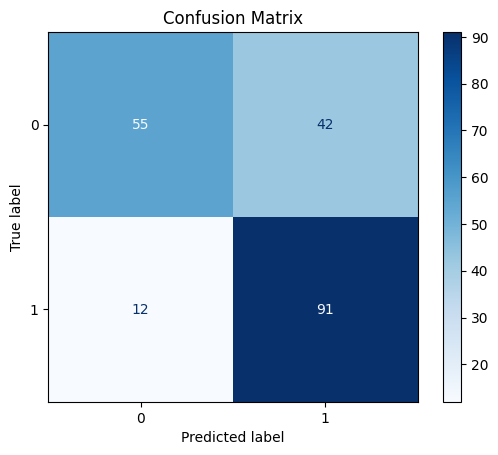

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



In [9]:
#Alternative: My Own
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, normalize=None,  # or 'true'/'pred' for rates
    cmap='Blues', values_format='d'  # use '.2f' if normalized
)
plt.title('Confusion Matrix')
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Hello students,

congratulations for having completed Part 7 - Natural Language Processing.

If you are up for some practical activities, here is a little challenge:

1. Run the other classification models we made in Part 3 - Classification, other than the one we used in the last tutorial.

2. Evaluate the performance of each of these models. Try to beat the Accuracy obtained in the tutorial. But remember, Accuracy is not enough, so you should also look at other performance metrics like Precision (measuring exactness), Recall (measuring completeness) and the F1 Score (compromise between Precision and Recall). Please find below these metrics formulas (TP = # True Positives, TN = # True Negatives, FP = # False Positives, FN = # False Negatives):

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * Precision * Recall / (Precision + Recall)

3. Try even other classification models that we haven't covered in Part 3 - Classification. Good ones for NLP include:

CART
C5.0
Maximum Entropy
Submit your results in the Q&A for this Lecture or by pm and justify in few words why you think it's the most appropriate model.

Enjoy Machine Learning!

Best to all,

Hadelin